In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [4]:
train = train.drop("id", axis=1)
output_id = test.id
test = test.drop("id", axis=1)


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          13840 non-null  object 
 1   Age                             13840 non-null  float64
 2   Height                          13840 non-null  float64
 3   Weight                          13840 non-null  float64
 4   family_history_with_overweight  13840 non-null  object 
 5   FAVC                            13840 non-null  object 
 6   FCVC                            13840 non-null  float64
 7   NCP                             13840 non-null  float64
 8   CAEC                            13840 non-null  object 
 9   SMOKE                           13840 non-null  object 
 10  CH2O                            13840 non-null  float64
 11  SCC                             13840 non-null  object 
 12  FAF                             

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

In [7]:
import matplotlib.pyplot as plt


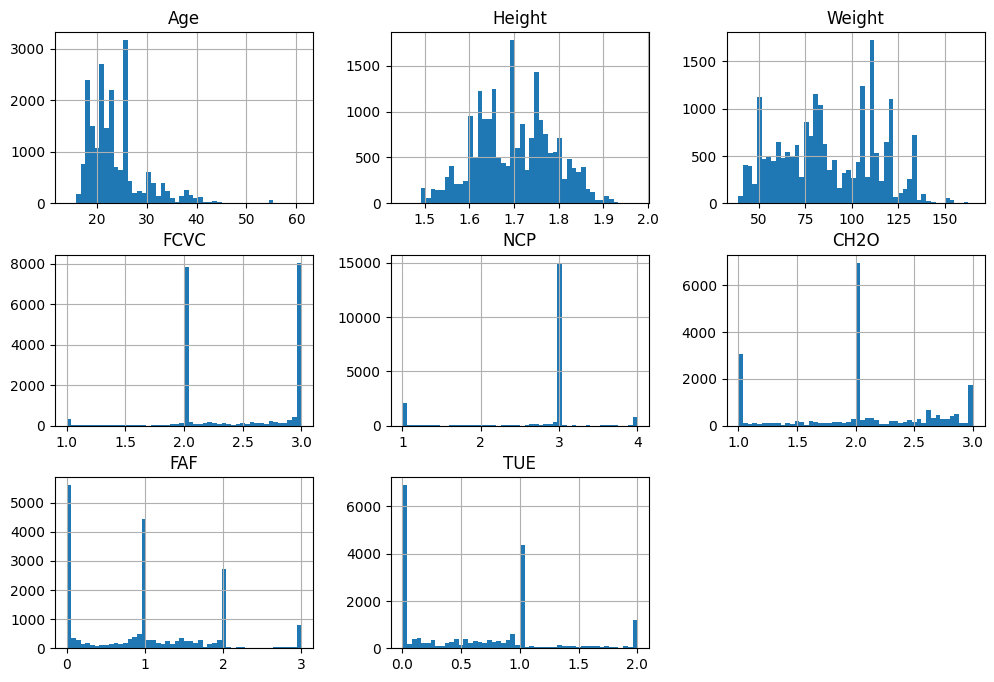

In [8]:
train.hist(bins=50, figsize=(12, 8))
plt.show()

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [10]:
train.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [11]:
weight_dict = {"Insufficient_Weight": 0,"Normal_Weight" : 1, "Overweight_Level_I" : 2, 
              "Overweight_Level_II" : 3, "Obesity_Type_I" : 4, "Obesity_Type_II" : 5,
              "Obesity_Type_III" : 6}
train.NObeyesdad = train.NObeyesdad.map(weight_dict)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

In [13]:
object_cols = train.select_dtypes(include=[object])
object_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          20758 non-null  object
 1   family_history_with_overweight  20758 non-null  object
 2   FAVC                            20758 non-null  object
 3   CAEC                            20758 non-null  object
 4   SMOKE                           20758 non-null  object
 5   SCC                             20758 non-null  object
 6   CALC                            20758 non-null  object
 7   MTRANS                          20758 non-null  object
dtypes: object(8)
memory usage: 1.3+ MB


In [14]:
numerical_cols = train.select_dtypes(include=[np.float64])
numerical_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     20758 non-null  float64
 1   Height  20758 non-null  float64
 2   Weight  20758 non-null  float64
 3   FCVC    20758 non-null  float64
 4   NCP     20758 non-null  float64
 5   CH2O    20758 non-null  float64
 6   FAF     20758 non-null  float64
 7   TUE     20758 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [15]:
list(numerical_cols)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [16]:
# Selecting only 'Age' and 'Weight' columns
age_weight_cols = numerical_cols[['Age', 'Weight']]
# Selecting the remaining columns
other_cols = numerical_cols.drop(['Age', 'Weight'], axis=1)

In [17]:
log_pipeline = make_pipeline(
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"))

default_num_pipeline = make_pipeline(StandardScaler())

In [18]:
X_train = train.drop('NObeyesdad', axis=1)
y_train = train['NObeyesdad']

In [19]:
preprocessing = ColumnTransformer([
    ("categorical",cat_pipeline, list(object_cols)),
    ("numerical", default_num_pipeline, list(numerical_cols)),
    ("log", log_pipeline, list(age_weight_cols))
])

In [20]:
X_train_prepared = preprocessing.fit_transform(X_train)
X_test_prepared = preprocessing.transform(test)

In [21]:
X_train_prepared


array([[ 0.        ,  1.        ,  0.        , ...,  0.59743795,
         0.23002248, -0.07754263],
       [ 1.        ,  0.        ,  0.        , ...,  0.63651292,
        -1.19185507, -1.20412907],
       [ 1.        ,  0.        ,  0.        , ...,  1.75523929,
        -1.19185507, -1.60421854],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.96609163,
        -0.67882214,  0.72686576],
       [ 0.        ,  1.        ,  0.        , ...,  0.59305495,
         1.74349082, -0.00736851],
       [ 0.        ,  1.        ,  0.        , ...,  0.16121399,
         0.63703187,  1.07882276]])

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [23]:

X_train_cut, X_valid, y_train_cut, y_valid = train_test_split(X_train_prepared, y_train, test_size=0.2, random_state=42)


In [ ]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_cut, y_train_cut)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the validation set
y_pred = classifier.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
conf_matrix = confusion_matrix(y_valid, y_pred)
classification_rep = classification_report(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Define hyperparameters to tune
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 5, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    # Create the classifier with the suggested hyperparameters
    classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        criterion='entropy'
    )

    # Use cross-validation for training and evaluation
    # You can also use a train-test split as you did before
    scores = cross_val_score(classifier, X_train_cut, y_train_cut, cv=5, scoring='accuracy')
    
    return scores.mean()

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)


In [382]:
X_test_prepared.shape

(13840, 32)

In [383]:
X_train_prepared.shape

(20758, 32)

In [384]:
# Best hyperparameters obtained from Optuna
best_hyperparameters = {'n_estimators': 248, 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2}

# Create the RandomForestClassifier with the best hyperparameters
classifier = RandomForestClassifier(
    n_estimators=best_hyperparameters['n_estimators'],
    max_depth=best_hyperparameters['max_depth'],
    min_samples_split=best_hyperparameters['min_samples_split'],
    min_samples_leaf=best_hyperparameters['min_samples_leaf'],
    random_state=42,
    criterion='entropy'  # You may want to specify the criterion used for splitting
)

# Train the model on the entire training set
classifier.fit(X_train_prepared, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_test_prepared)

## I will now try XGboosting for this task

In [24]:
import optuna
from sklearn.model_selection import cross_val_score
import xgboost as xgb

def objective(trial):
    # Define hyperparameters to tune
    params = {
        'n_estimators': trial.suggest_int("n_estimators", 50, 300),
        'max_depth': trial.suggest_int("max_depth", 5, 30),
        'learning_rate': trial.suggest_loguniform("learning_rate", 0.001, 0.1),
        'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        'gamma': trial.suggest_loguniform("gamma", 1e-8, 1.0),
        'min_child_weight': trial.suggest_int("min_child_weight", 1, 10)
    }

    # Create the XGBoost classifier with the suggested hyperparameters
    classifier = xgb.XGBClassifier(
        **params,
        random_state=42
    )

    # Use cross-validation for training and evaluation
    # You can also use a train-test split as you did before
    scores = cross_val_score(classifier, X_train_cut, y_train_cut, cv=5, scoring='accuracy')
    
    return scores.mean()

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)


[I 2024-02-22 17:04:44,796] A new study created in memory with name: no-name-328ad86a-4404-456a-a62e-5a242afd9678
/tmp/ipykernel_34/3702000222.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 0.001, 0.1),
/tmp/ipykernel_34/3702000222.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform("subsample", 0.5, 1.0),
/tmp/ipykernel_34/3702000222.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform("colsample_bytree", 

Best Hyperparameters: {'n_estimators': 294, 'max_depth': 13, 'learning_rate': 0.03616204789948354, 'subsample': 0.7788800000650833, 'colsample_bytree': 0.5073653477618315, 'gamma': 5.9011956159468e-07, 'min_child_weight': 7}


In [32]:
best_hyperparameters = {
    'n_estimators': 294,
    'max_depth': 13,
    'learning_rate': 0.03616204789948354,
    'subsample': 0.7788800000650833,
    'colsample_bytree': 0.5073653477618315,
    'gamma': 5.9011956159468e-07,
    'min_child_weight': 7
}
# Create the XGBoost classifier with the best hyperparameters
classifier = xgb.XGBClassifier(
    n_estimators=best_hyperparameters['n_estimators'],
    max_depth=best_hyperparameters['max_depth'],
    learning_rate=best_hyperparameters['learning_rate'],
    subsample=best_hyperparameters['subsample'],
    colsample_bytree=best_hyperparameters['colsample_bytree'],
    gamma=best_hyperparameters['gamma'],
    min_child_weight=best_hyperparameters['min_child_weight'],
    random_state=42
)

# Train the model on the entire training set
classifier.fit(X_train_prepared, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_test_prepared)

In [33]:
y_pred

array([5, 2, 6, ..., 0, 1, 5])

In [34]:
reversed_weight_dict = {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Overweight_Level_I', 3: 'Overweight_Level_II', 4: 'Obesity_Type_I', 5: 'Obesity_Type_II', 6: 'Obesity_Type_III'}

In [48]:
y_pred_labels = [reversed_weight_dict[val] for val in y_pred]

In [49]:
df = pd.DataFrame({"id" : output_id, "NObeyesdad": y_pred_labels}).to_csv('output.csv', index=False)

In [39]:
feature_names = preprocessing.get_feature_names_out()

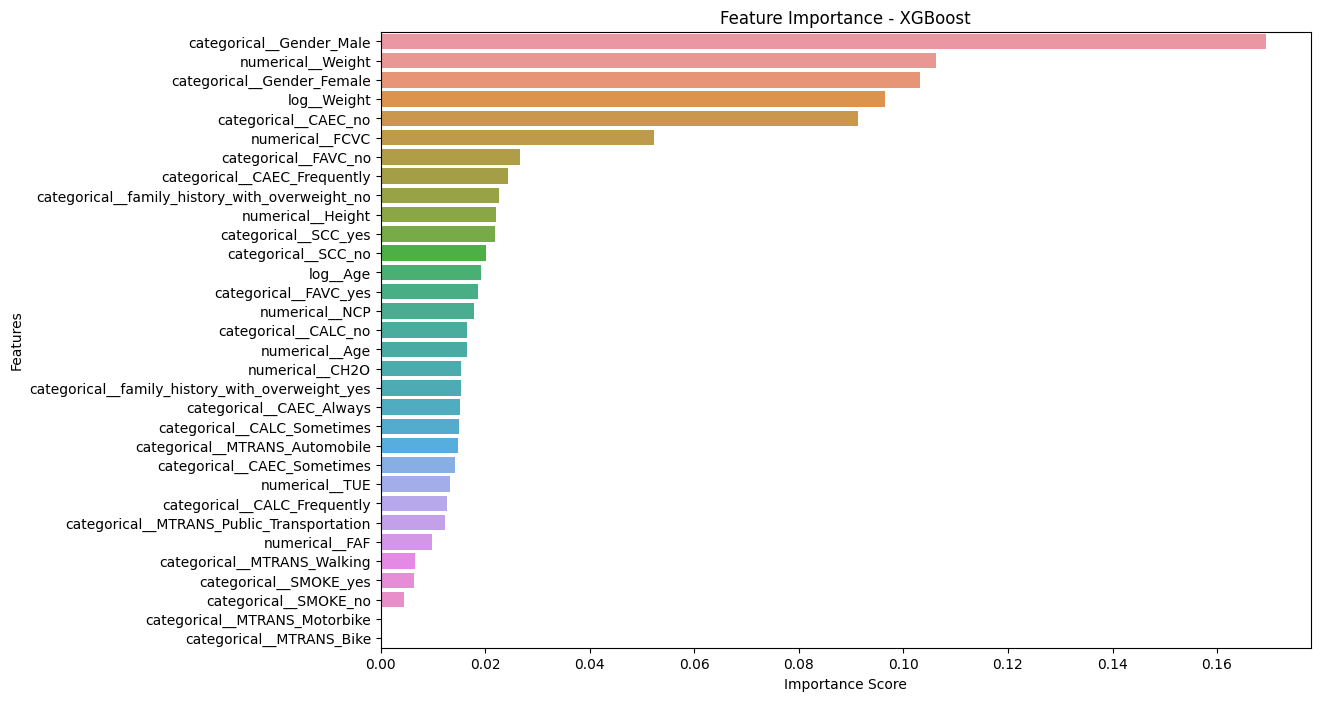

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already trained your XGBoost model (classifier) with your data

# Create a DataFrame with feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,  # Replace with your actual feature names
    'Importance': classifier.feature_importances_
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [45]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(classifier, threshold=0.016)  # You can adjust the threshold based on your needs
selector.fit(X_train_prepared, y_train)

selected_feature_indices = selector.get_support(indices=True)

X_train_selected = selector.transform(X_train_prepared)
X_valid_selected = selector.transform(X_test_prepared)

In [47]:
best_hyperparameters = {
    'n_estimators': 294,
    'max_depth': 13,
    'learning_rate': 0.03616204789948354,
    'subsample': 0.7788800000650833,
    'colsample_bytree': 0.5073653477618315,
    'gamma': 5.9011956159468e-07,
    'min_child_weight': 7
}
# Create the XGBoost classifier with the best hyperparameters
classifier = xgb.XGBClassifier(
    n_estimators=best_hyperparameters['n_estimators'],
    max_depth=best_hyperparameters['max_depth'],
    learning_rate=best_hyperparameters['learning_rate'],
    subsample=best_hyperparameters['subsample'],
    colsample_bytree=best_hyperparameters['colsample_bytree'],
    gamma=best_hyperparameters['gamma'],
    min_child_weight=best_hyperparameters['min_child_weight'],
    random_state=42
)

# Train the model on the entire training set
classifier.fit(X_train_selected, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_valid_selected)
